# Catboost
---
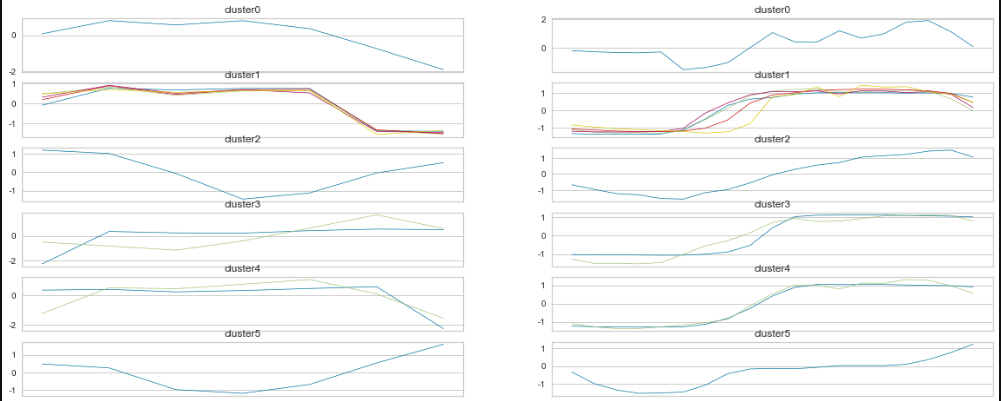
* cluster 0 : cluster 0 + cluster 1
* cluster 1 : cluster 2 + cluster 5
* cluster 2 : cluster 3 + cluster 4

In [21]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [25]:
train = pd.read_csv('./data/train_0822.csv', encoding='cp949')

train.solar_yes = train.solar_yes.astype(int)
train.ess_yes = train.ess_yes.astype(int)
train.sy_ey = train.sy_ey.astype(int)
train.sy_en = train.sy_en.astype(int)

train['hour_sin'] = np.sin(2 * np.pi * train['hour']/23.0)
train['hour_cos'] = np.cos(2 * np.pi * train['hour']/23.0)

train['date_sin'] = -np.sin(2 * np.pi * (train['month']+train['day']/31)/12)
train['date_cos'] = -np.cos(2 * np.pi * (train['month']+train['day']/31)/12)

train['month_sin'] = -np.sin(2 * np.pi * train['month']/12.0)
train['month_cos'] = -np.cos(2 * np.pi * train['month']/12.0)

train['weekday_sin'] = -np.sin(2 * np.pi * (train['weekday']+1)/7.0)
train['weekday_cos'] = -np.cos(2 * np.pi * (train['weekday']+1)/7.0)


train['work_time'] = 0
train['low_day'] = 0
train['particular'] = 0

trains = [train[train.building_number == num] for num in range(1,101,1)]

In [26]:
## cluster 0
for num in [10,13]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
    
    trains[num-1] = temp_df
for num in [14]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
    temp_df['particular'] = temp_df['hour'].isin([0,8,12,18]).astype(int)
    trains[num-1] = temp_df
for num in [15]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([4,5,6,7,8])).astype(int)
    trains[num-1] = temp_df

## cluster 1
for num in [17,18,19,21,22,69,70,72]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [26,28,76,78,80,82,83,84]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [71]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)*(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = (((temp_df['weekday']==5)&(temp_df['hour'].isin([10,11,13,14])))
                               |((temp_df['weekday'].isin([0,1,2,3,4,5]))&(temp_df['hour'].isin([0,1,2,3,4])))).astype(int)
    trains[num-1] = temp_df
for num in [53]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=4)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [55]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=19)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [50]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [56]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = ((temp_df['weekday']==2)&(temp_df['hour']==16)).astype(int)
    trains[num-1] = temp_df
for num in [60]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [20,23]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [58,59,77]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [27,74,79]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [57]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [24,25]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [29,30]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [31]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [50]:
    temp_df = trains[num-1]
    temp_df['particular'] = (((temp_df['weekday']==2)&(temp_df['hour']==16))|((temp_df['weekday']==2)&(temp_df['hour']==16))).astype(int)
    trains[num-1] = temp_df
for num in [1]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [8]:
    temp_df = trains[num-1]
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [12]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [88,90]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    trains[num-1] = temp_df
for num in [86]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    temp_df['particular'] = ((temp_df['month']==6)&(temp_df['day']==26)).astype(int)
    trains[num-1] = temp_df
for num in [87,89,91]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=9)).astype(int)
    trains[num-1] = temp_df
for num in [4]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    trains[num-1] = temp_df
for num in [7,16]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=5)).astype(int)
    trains[num-1] = temp_df
for num in [9]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=23)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [11]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [36]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    trains[num-1] = temp_df
for num in [75]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=15)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [92]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=6)).astype(int)
    trains[num-1] = temp_df

## cluster 2
for num in [32,33,34]:
    temp_df = trains[num-1]
    temp_df = temp_df[temp_df.month>=7]
    trains[num-1] = temp_df
for num in [61,65,66,67,68]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df
for num in [62,63,64]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df

## cluster 3
for num in [93,94,96,97,98,100]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=6)&(temp_df['hour']<=22)).astype(int)
    trains[num-1] = temp_df
for num in [42,43,44]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=20)).astype(int)
    trains[num-1] = temp_df
for num in [2,85,99]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [38,40,95]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=20)).astype(int)
    trains[num-1] = temp_df
for num in [3,81]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [6,41]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=22)).astype(int)
    trains[num-1] = temp_df
for num in [37,39]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [35]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df
for num in [54]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=5)&(temp_df['hour']<=20)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==0).astype(int)
    trains[num-1] = temp_df
for num in [5]:
    temp_df = trains[num-1]
    temp_df['particular'] = (((temp_df['weekday']==4)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==5)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==6)&(temp_df['hour'].isin([8,9,10,11,12,13,14,15,16,17,18])))).astype(int)
    trains[num-1] = temp_df
df = pd.concat(trains, ignore_index=True)
df = df.drop(['date_time','hour','day','month','weekday','date'], axis=1)

C:\Users\yeji4\AppData\Local\Temp/ipykernel_11544/318560867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
C:\Users\yeji4\AppData\Local\Temp/ipykernel_11544/318560867.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
C:\Users\yeji4\AppData\Local\Temp/ipykernel_11544/318560867.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [11]:
df

,building_number,temperature,windspeed,humidity,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,...,hour_cos,date_sin,date_cos,month_sin,month_cos,weekday_sin,weekday_cos,work_time,low_day,particular
0,1,18.6,0.9,42.0,1085.28,Other Buildings,110634.00,39570.00,0.0,0.0,...,1.000000,0.016889,0.999857,-1.224647e-16,1.000000,-4.338837e-01,0.900969,0,0,0
1,1,18.0,1.1,45.0,1047.36,Other Buildings,110634.00,39570.00,0.0,0.0,...,0.962917,0.016889,0.999857,-1.224647e-16,1.000000,-4.338837e-01,0.900969,0,0,0
2,1,17.7,1.5,45.0,974.88,Other Buildings,110634.00,39570.00,0.0,0.0,...,0.854419,0.016889,0.999857,-1.224647e-16,1.000000,-4.338837e-01,0.900969,0,0,0
3,1,16.7,1.4,48.0,953.76,Other Buildings,110634.00,39570.00,0.0,0.0,...,0.682553,0.016889,0.999857,-1.224647e-16,1.000000,-4.338837e-01,0.900969,0,0,0
4,1,18.4,2.8,43.0,986.40,Other Buildings,110634.00,39570.00,0.0,0.0,...,0.460065,0.016889,0.999857,-1.224647e-16,1.000000,-4.338837e-01,0.900969,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201835,100,26.2,2.0,93.0,1232.64,Hotel and Resort,57497.84,40035.23,0.0,0.0,...,0.460065,0.866025,0.500000,5.000000e-01,0.866025,2.449294e-16,-1.000000,1,0,0
201836,100,25.8,2.0,94.0,1103.28,Hotel and Resort,57497.84,40035.23,0.0,0.0,...,0.682553,0.866025,0.500000,5.000000e-01,0.866025,2.449294e-16,-1.000000,1,0,0
201837,100,25.6,0.7,95.0,964.56,Hotel and Resort,57497.84,40035.23,0.0,0.0,...,0.854419,0.866025,0.500000,5.000000e-01,0.866025,2.449294e-16,-1.000000,1,0,0
201838,100,25.4,1.7,97.0,773.28,Hotel and Resort,57497.84,40035.23,0.0,0.0,...,0.962917,0.866025,0.500000,5.000000e-01,0.866025,2.449294e-16,-1.000000,1,0,0


In [27]:
df_0 = df[df.km_cluster==0]
df_1 = df[df.km_cluster==1]
df_2 = df[df.km_cluster==2]

X_0 = df_0.drop('power_consumption', axis=1)
y_0 = df_0['power_consumption']
y_0_log = np.log(y_0)
X_0_train = X_0.drop('km_cluster', axis=1)

X_1 = df_1.drop('power_consumption', axis=1)
y_1 = df_1['power_consumption']
y_1_log = np.log(y_1)
X_1_train = X_1.drop('km_cluster', axis=1)

X_2 = df_2.drop('power_consumption', axis=1)
y_2 = df_2['power_consumption']
y_2_log = np.log(y_2)
X_2_train = X_2.drop('km_cluster', axis=1)


# Standard Scaling for continuous data
con_li = ['hour_sin', 'hour_cos', 'date_sin', 'date_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'temperature', 'windspeed', 
'humidity', 'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity', 'pcs_capacity', 'discomfort', 'temperature_3', 
'discomfort_3', 'ma_dis_3', 'ma_dis_5', 'CDH', 'temperature_mean', 'discomfort_mean', 'CDH_mean', 'sensory_temperature']

# ## one-hot encoding for categorical data
cat_li = ['building_number', 'holiday','air_yes','solar_yes',
         'ess_yes','sy_ey','sy_en','low_day','particular']

T = [X_0_train,X_1_train,X_2_train]

for train in T :
    for col in con_li :
        if train[col].std() == 0:
            train = train.drop(col, axis=1)
        else :
            train[col] = (train[col] - train[col].mean())/train[col].std()

    for col in cat_li :
        if train[col].nunique() == 1:        
            train = train.drop(col,axis=1)
        
X_0_train.building_type = X_0_train.building_type.astype('category')
X_0_train = pd.get_dummies(X_0_train)
X_1_train.building_type = X_1_train.building_type.astype('category')
X_1_train = pd.get_dummies(X_1_train)
X_2_train.building_type = X_2_train.building_type.astype('category')
X_2_train = pd.get_dummies(X_2_train)


In [17]:
X_1_train['building_number'].unique()

array([32, 33, 34, 35, 36, 61, 62, 63, 64, 65, 66, 67, 68], dtype=int64)

In [64]:
train = pd.read_csv('./data/train_0822.csv', encoding='cp949')
test = pd.read_csv('./data/test_0822.csv', encoding='cp949')

test.solar_yes = test.solar_yes.astype(int)
test.ess_yes = test.ess_yes.astype(int)
test.sy_ey = test.sy_ey.astype(int)
test.sy_en = test.sy_en.astype(int)

test['hour_sin'] = np.sin(2 * np.pi * test['hour']/23.0)
test['hour_cos'] = np.cos(2 * np.pi * test['hour']/23.0)

test['date_sin'] = -np.sin(2 * np.pi * (test['month']+test['day']/31)/12)
test['date_cos'] = -np.cos(2 * np.pi * (test['month']+test['day']/31)/12)

test['month_sin'] = -np.sin(2 * np.pi * test['month']/12.0)
test['month_cos'] = -np.cos(2 * np.pi * test['month']/12.0)

## cyclic transformation on weekday
test['weekday_sin'] = -np.sin(2 * np.pi * (test['weekday']+1)/7.0)
test['weekday_cos'] = -np.cos(2 * np.pi * (test['weekday']+1)/7.0)


test['work_time'] = 0
test['low_day'] = 0
test['particular'] = 0
tests = [test[test.building_number == num] for num in range(1,101,1)]

## cluster 0
for num in [10,13]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
    
    tests[num-1] = temp_df
for num in [14]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
    temp_df['particular'] = temp_df['hour'].isin([0,8,12,18]).astype(int)
    tests[num-1] = temp_df
for num in [15]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([4,5,6,7,8])).astype(int)
    tests[num-1] = temp_df

## cluster 1
for num in [17,18,19,21,22,69,70,72]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [26,28,76,78,80,82,83,84]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [71]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)*(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = (((temp_df['weekday']==5)&(temp_df['hour'].isin([10,11,13,14])))
                               |((temp_df['weekday'].isin([0,1,2,3,4,5]))&(temp_df['hour'].isin([0,1,2,3,4])))).astype(int)
    tests[num-1] = temp_df
for num in [53]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=4)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [55]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=19)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [50]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [56]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = ((temp_df['weekday']==2)&(temp_df['hour']==16)).astype(int)
    tests[num-1] = temp_df
for num in [60]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [20,23]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [58,59,77]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [27,74,79]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [57]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [24,25]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [29,30]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [31]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [50]:
    temp_df = tests[num-1]
    temp_df['particular'] = (((temp_df['weekday']==2)&(temp_df['hour']==16))|((temp_df['weekday']==2)&(temp_df['hour']==16))).astype(int)
    tests[num-1] = temp_df
for num in [1]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [8]:
    temp_df = tests[num-1]
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [12]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [88,90]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    tests[num-1] = temp_df
for num in [86]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    temp_df['particular'] = ((temp_df['month']==6)&(temp_df['day']==26)).astype(int)
    tests[num-1] = temp_df
for num in [87,89,91]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=9)).astype(int)
    tests[num-1] = temp_df
for num in [4]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    tests[num-1] = temp_df
for num in [7,16]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=5)).astype(int)
    tests[num-1] = temp_df
for num in [9]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=23)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [11]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [36]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    tests[num-1] = temp_df
for num in [75]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=15)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [92]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=6)).astype(int)
    tests[num-1] = temp_df

## cluster 2
for num in [32,33,34]:
    temp_df = tests[num-1]
    temp_df = temp_df[temp_df.month>=7]
    tests[num-1] = temp_df
for num in [61,65,66,67,68]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df
for num in [62,63,64]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df

## cluster 3
for num in [93,94,96,97,98,100]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=6)&(temp_df['hour']<=22)).astype(int)
    tests[num-1] = temp_df
for num in [42,43,44]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=20)).astype(int)
    tests[num-1] = temp_df
for num in [2,85,99]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [38,40,95]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=20)).astype(int)
    tests[num-1] = temp_df
for num in [3,81]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [6,41]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=22)).astype(int)
    tests[num-1] = temp_df
for num in [37,39]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [35]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df
for num in [54]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=5)&(temp_df['hour']<=20)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==0).astype(int)
    tests[num-1] = temp_df
for num in [5]:
    temp_df = tests[num-1]
    temp_df['particular'] = (((temp_df['weekday']==4)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==5)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==6)&(temp_df['hour'].isin([8,9,10,11,12,13,14,15,16,17,18])))).astype(int)
    tests[num-1] = temp_df
    

df = pd.concat(tests, ignore_index=True)
df = df.drop(['date_time','hour','day','month','weekday','date'], axis=1)
df.building_type = df.building_type.astype('category')

df_0 = df[df.km_cluster==0]
df_1 = df[df.km_cluster==1]
df_2 = df[df.km_cluster==2]

X_0_test = df_0.drop('km_cluster', axis=1)
X_1_test = df_1.drop('km_cluster', axis=1)
X_2_test = df_2.drop('km_cluster', axis=1)

# Standard Scaling for continuous data
con_li = ['hour_sin', 'hour_cos', 'date_sin', 'date_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'temperature', 'windspeed', 
'humidity', 'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity', 'pcs_capacity', 'discomfort', 'temperature_3', 
'discomfort_3', 'ma_dis_3', 'ma_dis_5', 'CDH', 'temperature_mean', 'discomfort_mean', 'CDH_mean', 'sensory_temperature']


cat_li = ['building_number','building_type','holiday','air_yes','solar_yes',
         'ess_yes','sy_ey','sy_en','low_day','particular']

T = [X_0_test, X_1_test, X_2_test]

for test in T :
    for col in con_li :
        if test[col].std() == 0:
            test = test.drop(col, axis=1)
        else :
            test[col] = (test[col] - test[col].mean())/test[col].std()

    for col in cat_li :
        if test[col].nunique() == 1:        
            test = test.drop(col,axis=1)
    test = pd.get_dummies(test)

X_0_test.building_type = X_0_test.building_type.astype('category')
X_0_test = pd.get_dummies(X_0_test)
X_1_test.building_type = X_1_test.building_type.astype('category')
X_1_test = pd.get_dummies(X_1_test)
X_2_test.building_type = X_2_test.building_type.astype('category')
X_2_test = pd.get_dummies(X_2_test)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [61]:
print(len(X_0_train) + len(X_1_train) + len(X_2_train))
print(len(X_0_test) + len(X_1_test) + len(X_2_test) )

201840
16800


## 변수중요도 시각화

### 변수중요도 시각화 : Cluster 0

In [56]:
from sktime.forecasting.model_selection import temporal_train_test_split

cols = X_0_train.columns
y_train, y_valid, X_train, X_valid = temporal_train_test_split(y=y_0_log,X=X_0_train, test_size=168)

xgbr_0 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_0.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_valid,y_valid)], eval_metric="logloss")

importance = xgbr_0.feature_importances_
feature = cols
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

[0]	validation_0-logloss:-243.43021
[1]	validation_0-logloss:-246.72635
[2]	validation_0-logloss:-248.44006
[3]	validation_0-logloss:-249.41158
[4]	validation_0-logloss:-250.05969
[5]	validation_0-logloss:-250.42187
[6]	validation_0-logloss:-250.71067
[7]	validation_0-logloss:-250.88549
[8]	validation_0-logloss:-251.02726
[9]	validation_0-logloss:-251.11903


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-logloss:-251.18580
[11]	validation_0-logloss:-251.21891
[12]	validation_0-logloss:-251.27518
[13]	validation_0-logloss:-251.29958
[14]	validation_0-logloss:-251.31826
[15]	validation_0-logloss:-251.32865
[16]	validation_0-logloss:-251.33927
[17]	validation_0-logloss:-251.34791
[18]	validation_0-logloss:-251.36689
[19]	validation_0-logloss:-251.38134
[20]	validation_0-logloss:-251.38593
[21]	validation_0-logloss:-251.39003
[22]	validation_0-logloss:-251.39213
[23]	validation_0-logloss:-251.39342
[24]	validation_0-logloss:-251.39825
[25]	validation_0-logloss:-251.39789
[26]	validation_0-logloss:-251.40147
[27]	validation_0-logloss:-251.40114
[28]	validation_0-logloss:-251.40056
[29]	validation_0-logloss:-251.39950
[30]	validation_0-logloss:-251.39996
[31]	validation_0-logloss:-251.39987
[32]	validation_0-logloss:-251.40368
[33]	validation_0-logloss:-251.40409
[34]	validation_0-logloss:-251.40290
[35]	validation_0-logloss:-251.40233
[36]	validation_0-logloss:-251.40864
[

,feature,importances
0,cooling_area,0.195717
1,work_time,0.174648
2,building_type_Hospital,0.146362
3,building_type_University,0.092869
4,building_type_Research Institute,0.082700
5,solar_power_capacity,0.054885
6,low_day,0.054876
7,total_area,0.049130
8,sy_en,0.042634
9,holiday,0.029654


In [57]:
non_zero_importance_columns_0 = importances[importances['importances'] != 0]['feature'].tolist()
non_zero_importance_columns_0

['cooling_area',
 'work_time',
 'building_type_Hospital',
 'building_type_University',
 'building_type_Research Institute',
 'solar_power_capacity',
 'low_day',
 'total_area',
 'sy_en',
 'holiday',
 'building_number',
 'building_type_Commercial',
 'hour_cos',
 'temperature',
 'hour_sin',
 'date_sin',
 'discomfort',
 'weekday_sin',
 'weekday_cos',
 'CDH']

[0]	validation_0-logloss:-243.43021
[1]	validation_0-logloss:-246.72635
[2]	validation_0-logloss:-248.44006
[3]	validation_0-logloss:-249.41158
[4]	validation_0-logloss:-250.05969
[5]	validation_0-logloss:-250.42187
[6]	validation_0-logloss:-250.71067
[7]	validation_0-logloss:-250.88549
[8]	validation_0-logloss:-251.02726
[9]	validation_0-logloss:-251.11903


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-logloss:-251.18580
[11]	validation_0-logloss:-251.21891
[12]	validation_0-logloss:-251.27518
[13]	validation_0-logloss:-251.29958
[14]	validation_0-logloss:-251.31826
[15]	validation_0-logloss:-251.32865
[16]	validation_0-logloss:-251.33927
[17]	validation_0-logloss:-251.34791
[18]	validation_0-logloss:-251.36689
[19]	validation_0-logloss:-251.38134
[20]	validation_0-logloss:-251.38593
[21]	validation_0-logloss:-251.39003
[22]	validation_0-logloss:-251.39213
[23]	validation_0-logloss:-251.39342
[24]	validation_0-logloss:-251.39825
[25]	validation_0-logloss:-251.39789
[26]	validation_0-logloss:-251.40147
[27]	validation_0-logloss:-251.40114
[28]	validation_0-logloss:-251.40056
[29]	validation_0-logloss:-251.39950
[30]	validation_0-logloss:-251.39996
[31]	validation_0-logloss:-251.39987
[32]	validation_0-logloss:-251.40368
[33]	validation_0-logloss:-251.40409
[34]	validation_0-logloss:-251.40290
[35]	validation_0-logloss:-251.40233
[36]	validation_0-logloss:-251.40864
[

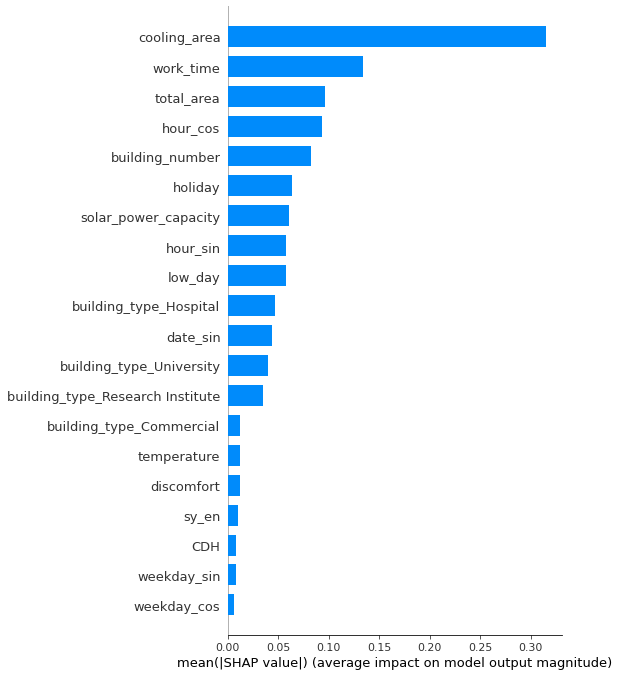

In [47]:
import shap

shap.initjs()

cols = X_0_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_0_log,X=X_0_train, test_size=168)

xgbr_0 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_0.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")
explainer = shap.TreeExplainer(xgbr_0)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, cols, plot_type="bar")

### 변수중요도 시각화 : Cluster 1

In [48]:
cols = X_1_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_1_log,X=X_1_train, test_size=168)

xgbr_1 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_1.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")

importance = xgbr_1.feature_importances_
feature = cols
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

[0]	validation_0-logloss:-254.95955
[1]	validation_0-logloss:-258.48146
[2]	validation_0-logloss:-260.21835
[3]	validation_0-logloss:-261.23764
[4]	validation_0-logloss:-261.87826
[5]	validation_0-logloss:-262.31035
[6]	validation_0-logloss:-262.60244
[7]	validation_0-logloss:-262.80425
[8]	validation_0-logloss:-262.93665
[9]	validation_0-logloss:-263.03792
[10]	validation_0-logloss:-263.10460
[11]	validation_0-logloss:-263.15563
[12]	validation_0-logloss:-263.18773
[13]	validation_0-logloss:-263.21727
[14]	validation_0-logloss:-263.23667
[15]	validation_0-logloss:-263.25385
[16]	validation_0-logloss:-263.26588
[17]	validation_0-logloss:-263.27178
[18]	validation_0-logloss:-263.27739
[19]	validation_0-logloss:-263.28127
[20]	validation_0-logloss:-263.28648
[21]	validation_0-logloss:-263.29101
[22]	validation_0-logloss:-263.29223
[23]	validation_0-logloss:-263.29352
[24]	validation_0-logloss:-263.29520
[25]	validation_0-logloss:-263.29465
[26]	validation_0-logloss:-263.29412
[27]	valida

,feature,importances
0,building_number,0.693888
1,total_area,0.111161
2,cooling_area,0.094355
3,work_time,0.041106
4,ma_dis_5,0.022670
5,hour_cos,0.009503
6,date_sin,0.006622
7,hour_sin,0.005641
8,CDH,0.004889
9,holiday,0.003309


[0]	validation_0-logloss:-254.95955
[1]	validation_0-logloss:-258.48146
[2]	validation_0-logloss:-260.21835
[3]	validation_0-logloss:-261.23764
[4]	validation_0-logloss:-261.87826
[5]	validation_0-logloss:-262.31035
[6]	validation_0-logloss:-262.60244
[7]	validation_0-logloss:-262.80425
[8]	validation_0-logloss:-262.93665
[9]	validation_0-logloss:-263.03792
[10]	validation_0-logloss:-263.10460
[11]	validation_0-logloss:-263.15563
[12]	validation_0-logloss:-263.18773
[13]	validation_0-logloss:-263.21727
[14]	validation_0-logloss:-263.23667
[15]	validation_0-logloss:-263.25385
[16]	validation_0-logloss:-263.26588
[17]	validation_0-logloss:-263.27178
[18]	validation_0-logloss:-263.27739


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[19]	validation_0-logloss:-263.28127
[20]	validation_0-logloss:-263.28648
[21]	validation_0-logloss:-263.29101
[22]	validation_0-logloss:-263.29223
[23]	validation_0-logloss:-263.29352
[24]	validation_0-logloss:-263.29520
[25]	validation_0-logloss:-263.29465
[26]	validation_0-logloss:-263.29412
[27]	validation_0-logloss:-263.29517
[28]	validation_0-logloss:-263.29564
[29]	validation_0-logloss:-263.29610
[30]	validation_0-logloss:-263.29719
[31]	validation_0-logloss:-263.29805
[32]	validation_0-logloss:-263.29671
[33]	validation_0-logloss:-263.29636
[34]	validation_0-logloss:-263.29675
[35]	validation_0-logloss:-263.29656
[36]	validation_0-logloss:-263.29709
[37]	validation_0-logloss:-263.29674
[38]	validation_0-logloss:-263.29694
[39]	validation_0-logloss:-263.29700
[40]	validation_0-logloss:-263.29723
[41]	validation_0-logloss:-263.29689
[42]	validation_0-logloss:-263.29618
[43]	validation_0-logloss:-263.29582
[44]	validation_0-logloss:-263.29674
[45]	validation_0-logloss:-263.29695
[

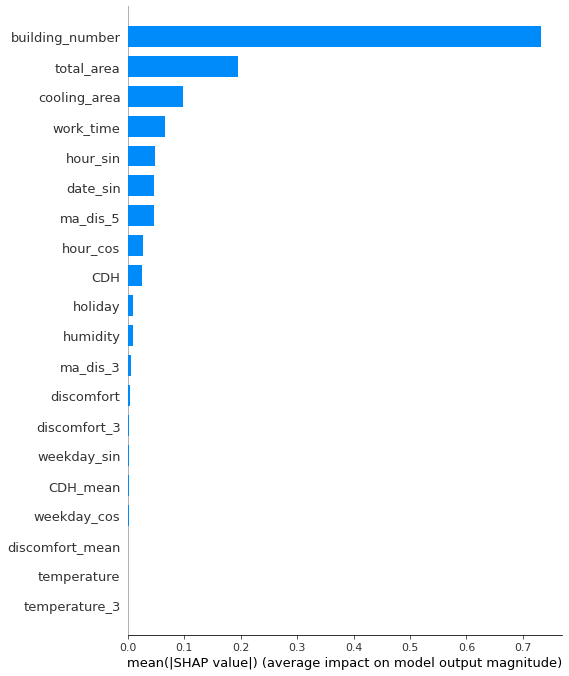

In [49]:
shap.initjs()

cols = X_1_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_1_log,X=X_1_train, test_size=168)

xgbr_1 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_1.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")
explainer = shap.TreeExplainer(xgbr_1)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, cols, plot_type="bar")

In [51]:
# zero_importance_columns_1 = importances[importances['importances'] == 0]['feature'].tolist()
# print(zero_importance_columns_1)
non_zero_importance_columns_1 = importances[importances['importances'] != 0]['feature'].tolist()
non_zero_importance_columns_1

['building_number',
 'total_area',
 'cooling_area',
 'work_time',
 'ma_dis_5',
 'hour_cos',
 'date_sin',
 'hour_sin',
 'CDH',
 'holiday',
 'humidity',
 'ma_dis_3',
 'discomfort',
 'weekday_cos',
 'weekday_sin',
 'discomfort_3',
 'CDH_mean',
 'temperature_3',
 'discomfort_mean',
 'temperature_mean',
 'sensory_temperature',
 'temperature',
 'windspeed']

### 변수중요도 시각화 : Cluster 2

In [52]:
cols = X_2_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_2_log,X=X_2_train, test_size=168)

xgbr_2 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_2.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")

importance = xgbr_2.feature_importances_
feature = cols
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

[0]	validation_0-logloss:-215.60285
[1]	validation_0-logloss:-218.64720
[2]	validation_0-logloss:-220.20375
[3]	validation_0-logloss:-221.08127
[4]	validation_0-logloss:-221.65894
[5]	validation_0-logloss:-222.00379
[6]	validation_0-logloss:-222.26671
[7]	validation_0-logloss:-222.40527
[8]	validation_0-logloss:-222.52452
[9]	validation_0-logloss:-222.58323
[10]	validation_0-logloss:-222.62743
[11]	validation_0-logloss:-222.65238
[12]	validation_0-logloss:-222.68088
[13]	validation_0-logloss:-222.68500
[14]	validation_0-logloss:-222.69435
[15]	validation_0-logloss:-222.69980
[16]	validation_0-logloss:-222.69586
[17]	validation_0-logloss:-222.70347
[18]	validation_0-logloss:-222.70854
[19]	validation_0-logloss:-222.69676
[20]	validation_0-logloss:-222.69414
[21]	validation_0-logloss:-222.69684
[22]	validation_0-logloss:-222.69796
[23]	validation_0-logloss:-222.69656
[24]	validation_0-logloss:-222.69551
[25]	validation_0-logloss:-222.69561
[26]	validation_0-logloss:-222.68708
[27]	valida

,feature,importances
0,building_type_Department Store and Outlet,0.292655
1,work_time,0.237793
2,ess_capacity,0.140784
3,building_number,0.078506
4,total_area,0.056485
5,particular,0.044504
6,solar_power_capacity,0.032942
7,cooling_area,0.031447
8,hour_cos,0.014979
9,hour_sin,0.011435


In [53]:
# zero_importance_columns_2 = importances[importances['importances'] == 0]['feature'].tolist()
# print(zero_importance_columns_2)
non_zero_importance_columns_2 = importances[importances['importances'] != 0]['feature'].tolist()
non_zero_importance_columns_2

['building_type_Department Store and Outlet',
 'work_time',
 'ess_capacity',
 'building_number',
 'total_area',
 'particular',
 'solar_power_capacity',
 'cooling_area',
 'hour_cos',
 'hour_sin',
 'temperature',
 'discomfort',
 'weekday_cos',
 'building_type_Discount Mart',
 'holiday',
 'date_sin',
 'weekday_sin',
 'discomfort_mean',
 'low_day',
 'ma_dis_3',
 'temperature_mean',
 'windspeed',
 'CDH_mean',
 'humidity',
 'sensory_temperature',
 'ma_dis_5',
 'CDH',
 'discomfort_3',
 'temperature_3']

[0]	validation_0-logloss:-215.60285
[1]	validation_0-logloss:-218.64720
[2]	validation_0-logloss:-220.20375
[3]	validation_0-logloss:-221.08127
[4]	validation_0-logloss:-221.65894
[5]	validation_0-logloss:-222.00379
[6]	validation_0-logloss:-222.26671
[7]	validation_0-logloss:-222.40527


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-logloss:-222.52452
[9]	validation_0-logloss:-222.58323
[10]	validation_0-logloss:-222.62743
[11]	validation_0-logloss:-222.65238
[12]	validation_0-logloss:-222.68088
[13]	validation_0-logloss:-222.68500
[14]	validation_0-logloss:-222.69435
[15]	validation_0-logloss:-222.69980
[16]	validation_0-logloss:-222.69586
[17]	validation_0-logloss:-222.70347
[18]	validation_0-logloss:-222.70854
[19]	validation_0-logloss:-222.69676
[20]	validation_0-logloss:-222.69414
[21]	validation_0-logloss:-222.69684
[22]	validation_0-logloss:-222.69796
[23]	validation_0-logloss:-222.69656
[24]	validation_0-logloss:-222.69551
[25]	validation_0-logloss:-222.69561
[26]	validation_0-logloss:-222.68708
[27]	validation_0-logloss:-222.68595
[28]	validation_0-logloss:-222.68839
[29]	validation_0-logloss:-222.68826
[30]	validation_0-logloss:-222.68834
[31]	validation_0-logloss:-222.68785
[32]	validation_0-logloss:-222.68621
[33]	validation_0-logloss:-222.68549
[34]	validation_0-logloss:-222.68324
[35

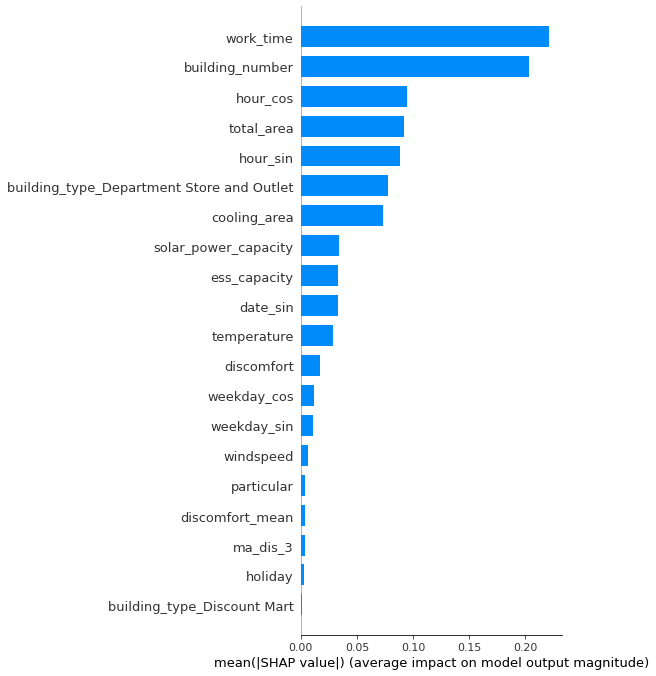

In [54]:
shap.initjs()

cols = X_2_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_2_log,X=X_2_train, test_size=168)

xgbr_2 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_2.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")
explainer = shap.TreeExplainer(xgbr_2)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, cols, plot_type="bar")

In [63]:
X_0_test.columns

Index(['building_number', 'temperature', 'windspeed', 'humidity',
       'building_type', 'total_area', 'cooling_area', 'solar_power_capacity',
       'ess_capacity', 'pcs_capacity', 'discomfort', 'temperature_3',
       'discomfort_3', 'holiday', 'ma_dis_3', 'ma_dis_5', 'CDH',
       'temperature_mean', 'discomfort_mean', 'CDH_mean', 'air_yes',
       'solar_yes', 'ess_yes', 'sy_ey', 'sy_en', 'sensory_temperature',
       'hour_sin', 'hour_cos', 'date_sin', 'date_cos', 'month_sin',
       'month_cos', 'weekday_sin', 'weekday_cos', 'work_time', 'low_day',
       'particular'],
      dtype='object')

In [65]:
col_0 = ['cooling_area','work_time','building_type_Hospital','building_type_University','building_type_Research Institute',
        'solar_power_capacity','low_day','total_area','sy_en','holiday','building_number','building_type_Commercial',
 'hour_cos','temperature','hour_sin','date_sin','discomfort','weekday_sin','weekday_cos','CDH']
col_1 = ['building_number','total_area','cooling_area','work_time','ma_dis_5','hour_cos','date_sin','hour_sin','CDH','holiday',
 'humidity','ma_dis_3','discomfort','weekday_cos','weekday_sin','discomfort_3','CDH_mean','temperature_3','discomfort_mean',
'temperature_mean','sensory_temperature','temperature','windspeed']
col_2 = ['building_type_Department Store and Outlet','work_time','ess_capacity','building_number','total_area','particular',
    'solar_power_capacity','cooling_area','hour_cos','hour_sin','temperature','discomfort','weekday_cos','building_type_Discount Mart',
 'holiday','date_sin','weekday_sin','discomfort_mean','low_day','ma_dis_3','temperature_mean','windspeed','CDH_mean','humidity',
 'sensory_temperature','ma_dis_5','CDH','discomfort_3','temperature_3']

X_0_train = X_0_train[col_0]
X_1_train = X_1_train[col_1]
X_2_train = X_2_train[col_2]

X_0_test = X_0_test[col_0]
X_1_test = X_1_test[col_1]
X_2_test = X_2_test[col_2]

## SMAPE

In [66]:
def smape(true, pred):
    v = 2 * abs(pred - true) / ((abs(pred) + abs(true)))
    result = np.mean(v) * 100
    return result

## Tuning : Optuna

In [ ]:
import optuna
from catboost import CatBoostRegressor

trains = [X_0_train, X_1_train, X_2_train]
ys = [y_0_log, y_1_log,y_2_log]

cat_bestli = []
cat_paramli = []

for i, (train, y) in enumerate(zip(trains, ys)) :
    X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=168*train.building_number.nunique())
    def objective(trial):
        param = {}
        param['learning_rate'] = trial.suggest_float('learning_rate',0.02, 0.08, step=0.002)
        param['depth'] = trial.suggest_int('depth', 10, 16)
        param['l2_leaf_reg'] = trial.suggest_float('l2_leaf_reg',low=2.0, high=4, step=0.5)
        param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 2])
        param['grow_policy'] = 'Depthwise'
        param['iterations'] = 1000
        param['eval_metric'] = 'SMAPE'
        param['od_type'] = 'iter'
        param['od_wait'] = 20
        param['random_state'] = 1
        param['logging_level'] = 'Silent'
        regressor = CatBoostRegressor(**param)
        regressor.fit(X_train, y_train,early_stopping_rounds=50)
        sm = smape(np.exp(np.array(y_valid)), np.exp(np.array(regressor.predict(X_valid))))
        return sm

    study = optuna.create_study(study_name=f'catboost-seed')
    study.optimize(objective, n_trials=30, n_jobs=-1, timeout=12000)

    cat = study.best_trial
    cat_param = cat.params
    print('Best Trial: score {},\nparams {}'.format(cat.value, cat_param))

    cat_bestli.append(cat.value)
    cat_paramli.append(cat_param)

[I 2023-08-23 00:53:00,584] A new study created in memory with name: catboost-seed
[I 2023-08-23 00:58:13,787] Trial 6 finished with value: 3.101142708402351 and parameters: {'learning_rate': 0.054000000000000006, 'depth': 10, 'l2_leaf_reg': 3.0, 'min_child_samples': 2}. Best is trial 6 with value: 3.101142708402351.
[I 2023-08-23 01:06:21,748] Trial 2 finished with value: 2.7978073436474142 and parameters: {'learning_rate': 0.074, 'depth': 11, 'l2_leaf_reg': 4.0, 'min_child_samples': 1}. Best is trial 2 with value: 2.7978073436474142.
[I 2023-08-23 01:09:01,369] Trial 8 finished with value: 2.8866148630911996 and parameters: {'learning_rate': 0.08, 'depth': 10, 'l2_leaf_reg': 2.5, 'min_child_samples': 1}. Best is trial 2 with value: 2.7978073436474142.
[I 2023-08-23 01:14:44,793] Trial 3 finished with value: 2.6507023037893145 and parameters: {'learning_rate': 0.07200000000000001, 'depth': 12, 'l2_leaf_reg': 3.0, 'min_child_samples': 1}. Best is trial 3 with value: 2.6507023037893145.

Best Trial: score 2.467659161874931,
params {'learning_rate': 0.044, 'depth': 16, 'l2_leaf_reg': 2.0, 'min_child_samples': 1}


[I 2023-08-23 11:52:07,194] Trial 5 finished with value: 1.9703213168129978 and parameters: {'learning_rate': 0.034, 'depth': 11, 'l2_leaf_reg': 4.0, 'min_child_samples': 2}. Best is trial 5 with value: 1.9703213168129978.
[I 2023-08-23 11:56:10,317] Trial 6 finished with value: 1.9760601194597955 and parameters: {'learning_rate': 0.041999999999999996, 'depth': 12, 'l2_leaf_reg': 2.5, 'min_child_samples': 2}. Best is trial 5 with value: 1.9703213168129978.
[I 2023-08-23 12:01:12,766] Trial 2 finished with value: 2.0735325330193373 and parameters: {'learning_rate': 0.052000000000000005, 'depth': 13, 'l2_leaf_reg': 2.0, 'min_child_samples': 2}. Best is trial 5 with value: 1.9703213168129978.
[I 2023-08-23 12:13:55,936] Trial 4 finished with value: 2.129351548523811 and parameters: {'learning_rate': 0.03, 'depth': 14, 'l2_leaf_reg': 3.5, 'min_child_samples': 2}. Best is trial 5 with value: 1.9703213168129978.
[I 2023-08-23 12:19:07,896] Trial 1 finished with value: 2.5730275079576232 and 

Best Trial: score 1.7851847201099578,
params {'learning_rate': 0.028, 'depth': 10, 'l2_leaf_reg': 3.0, 'min_child_samples': 1}


[I 2023-08-23 14:24:37,242] Trial 3 finished with value: 4.801643928460504 and parameters: {'learning_rate': 0.062, 'depth': 10, 'l2_leaf_reg': 4.0, 'min_child_samples': 1}. Best is trial 3 with value: 4.801643928460504.
[I 2023-08-23 14:29:20,830] Trial 4 finished with value: 4.785034444764444 and parameters: {'learning_rate': 0.07, 'depth': 11, 'l2_leaf_reg': 2.5, 'min_child_samples': 2}. Best is trial 4 with value: 4.785034444764444.
